In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

Using TensorFlow backend.


57344/57026 [==============================] - 2s 36us/step


In [2]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [4]:
train_targets.shape

(404,)

In [9]:
mean = train_data.mean(axis=0)

In [10]:
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [11]:
train_data -= mean

In [12]:
std = train_data.std(axis=0)

In [13]:
train_data/=std

In [14]:
test_data -= mean

In [15]:
test_data /=std

In [16]:
from keras import models
from keras import layers

In [28]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [17]:
import numpy as np

In [23]:
k=4
num_val_samples = len(train_data)//k

In [24]:
num_val_samples

101

In [20]:
num_epochs =100

In [21]:
all_scores =[]

In [29]:
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i*num_val_samples :(i+1)*num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets=np.concatenate(
        [train_targets[:i*num_val_samples],train_targets[(i+1)*num_val_samples:]],axis=0)
    model= build_model();
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=2)
    val_mse, val_mae = model.evaluate(val_data,val_targets,verbose=2)
    all_scores.append(val_mae)
    

processing fold # 0
Epoch 1/100
 - 1s - loss: 222.0137 - mean_absolute_error: 11.2548
Epoch 2/100
 - 0s - loss: 32.0475 - mean_absolute_error: 3.9776
Epoch 3/100
 - 0s - loss: 21.0845 - mean_absolute_error: 3.1606
Epoch 4/100
 - 0s - loss: 17.1189 - mean_absolute_error: 2.7976
Epoch 5/100
 - 0s - loss: 16.0404 - mean_absolute_error: 2.6180
Epoch 6/100
 - 0s - loss: 14.2430 - mean_absolute_error: 2.5494
Epoch 7/100
 - 0s - loss: 13.7573 - mean_absolute_error: 2.4156
Epoch 8/100
 - 0s - loss: 12.6915 - mean_absolute_error: 2.4131
Epoch 9/100
 - 0s - loss: 11.6590 - mean_absolute_error: 2.3408
Epoch 10/100
 - 0s - loss: 11.5134 - mean_absolute_error: 2.3359
Epoch 11/100
 - 0s - loss: 11.5029 - mean_absolute_error: 2.2383
Epoch 12/100
 - 0s - loss: 11.4030 - mean_absolute_error: 2.2475
Epoch 13/100
 - 0s - loss: 10.2306 - mean_absolute_error: 2.1489
Epoch 14/100
 - 0s - loss: 10.3345 - mean_absolute_error: 2.2206
Epoch 15/100
 - 0s - loss: 10.0001 - mean_absolute_error: 2.0839
Epoch 16/100

 - 0s - loss: 7.6579 - mean_absolute_error: 1.8373
Epoch 29/100
 - 0s - loss: 8.0744 - mean_absolute_error: 1.8653
Epoch 30/100
 - 0s - loss: 8.2355 - mean_absolute_error: 1.8100
Epoch 31/100
 - 0s - loss: 8.1418 - mean_absolute_error: 1.8666
Epoch 32/100
 - 0s - loss: 8.0194 - mean_absolute_error: 1.8868
Epoch 33/100
 - 0s - loss: 7.6792 - mean_absolute_error: 1.8340
Epoch 34/100
 - 0s - loss: 8.0405 - mean_absolute_error: 1.8517
Epoch 35/100
 - 0s - loss: 8.0330 - mean_absolute_error: 1.7995
Epoch 36/100
 - 0s - loss: 7.3919 - mean_absolute_error: 1.7497
Epoch 37/100
 - 0s - loss: 7.9079 - mean_absolute_error: 1.7953
Epoch 38/100
 - 0s - loss: 8.0778 - mean_absolute_error: 1.8028
Epoch 39/100
 - 0s - loss: 7.2192 - mean_absolute_error: 1.7269
Epoch 40/100
 - 0s - loss: 7.5061 - mean_absolute_error: 1.8115
Epoch 41/100
 - 0s - loss: 7.5372 - mean_absolute_error: 1.7267
Epoch 42/100
 - 0s - loss: 7.0665 - mean_absolute_error: 1.7127
Epoch 43/100
 - 0s - loss: 7.1501 - mean_absolute_err

Epoch 56/100
 - 0s - loss: 4.5482 - mean_absolute_error: 1.5037
Epoch 57/100
 - 0s - loss: 4.5350 - mean_absolute_error: 1.5334
Epoch 58/100
 - 0s - loss: 4.2489 - mean_absolute_error: 1.4851
Epoch 59/100
 - 0s - loss: 4.5843 - mean_absolute_error: 1.5080
Epoch 60/100
 - 0s - loss: 4.5139 - mean_absolute_error: 1.5339
Epoch 61/100
 - 0s - loss: 4.5146 - mean_absolute_error: 1.4949
Epoch 62/100
 - 0s - loss: 4.1997 - mean_absolute_error: 1.4731
Epoch 63/100
 - 0s - loss: 4.0920 - mean_absolute_error: 1.4953
Epoch 64/100
 - 0s - loss: 4.2204 - mean_absolute_error: 1.4709
Epoch 65/100
 - 0s - loss: 4.0709 - mean_absolute_error: 1.4184
Epoch 66/100
 - 0s - loss: 3.9731 - mean_absolute_error: 1.4442
Epoch 67/100
 - 0s - loss: 4.3108 - mean_absolute_error: 1.4499
Epoch 68/100
 - 0s - loss: 4.1387 - mean_absolute_error: 1.4341
Epoch 69/100
 - 0s - loss: 4.0937 - mean_absolute_error: 1.4226
Epoch 70/100
 - 0s - loss: 4.1217 - mean_absolute_error: 1.3763
Epoch 71/100
 - 0s - loss: 4.1767 - mean

Epoch 84/100
 - 0s - loss: 5.0472 - mean_absolute_error: 1.4061
Epoch 85/100
 - 0s - loss: 4.6929 - mean_absolute_error: 1.3145
Epoch 86/100
 - 0s - loss: 4.4934 - mean_absolute_error: 1.3482
Epoch 87/100
 - 0s - loss: 4.4824 - mean_absolute_error: 1.3937
Epoch 88/100
 - 0s - loss: 4.8087 - mean_absolute_error: 1.3605
Epoch 89/100
 - 0s - loss: 4.2501 - mean_absolute_error: 1.3270
Epoch 90/100
 - 0s - loss: 4.4239 - mean_absolute_error: 1.3880
Epoch 91/100
 - 0s - loss: 4.5950 - mean_absolute_error: 1.3717
Epoch 92/100
 - 0s - loss: 4.3268 - mean_absolute_error: 1.3610
Epoch 93/100
 - 0s - loss: 4.5873 - mean_absolute_error: 1.3719
Epoch 94/100
 - 0s - loss: 3.9297 - mean_absolute_error: 1.3620
Epoch 95/100
 - 0s - loss: 4.1231 - mean_absolute_error: 1.3346
Epoch 96/100
 - 0s - loss: 4.1749 - mean_absolute_error: 1.3301
Epoch 97/100
 - 0s - loss: 4.4189 - mean_absolute_error: 1.3157
Epoch 98/100
 - 0s - loss: 4.3031 - mean_absolute_error: 1.2942
Epoch 99/100
 - 0s - loss: 3.9543 - mean

In [30]:
all_scores

[2.120571533052048, 2.099952534873887, 2.956110973169308, 2.384712275892201]

In [31]:
np.mean(all_scores)

2.390336829246861

In [32]:
num_epochs=500
all_mae_histories=[]
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1,verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [33]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [34]:
all_mae_histories

[[3.835150690362005,
  2.7898491868878357,
  2.596461796524501,
  2.345317840576172,
  2.416455174436664,
  2.425473203753481,
  2.267031697943659,
  2.27393370335645,
  2.1704723669750856,
  2.320395318588408,
  2.1003625888635615,
  2.3076779110596912,
  2.1156864355106166,
  1.9711020535761767,
  1.9375604025208124,
  2.132481811070206,
  2.0494863727305197,
  1.9040809197000939,
  2.2488433819005986,
  2.103147077088309,
  1.8845552501111928,
  1.8780702175480304,
  1.8327560708074286,
  1.877388840854758,
  1.9474777750449606,
  1.9495970093377746,
  1.849010698866136,
  1.829826817654147,
  1.853480046338374,
  2.222734526832505,
  2.0457100679378697,
  2.2838388575185644,
  2.221235199729995,
  2.1363189999419863,
  2.015829794477708,
  2.0092873762149623,
  2.3536986266032303,
  1.8246312896804053,
  1.8263265496433372,
  2.073509721472712,
  1.9706804114993255,
  1.951247545752195,
  2.0542025707735876,
  1.9655048634746286,
  1.8922990619546116,
  2.1182623664931497,
  2.0601

In [35]:
average_mae_history

[4.797331335520981,
 3.3902273366946982,
 3.0629967592730383,
 2.748941415607339,
 2.8007021363418882,
 2.7027618814222882,
 2.639672036218171,
 2.6349857384615607,
 2.5623502330024643,
 2.593229630205891,
 2.492080222262014,
 2.733158872859313,
 2.514996337418509,
 2.4011323900506047,
 2.4318618703596666,
 2.423700416442191,
 2.479765015073342,
 2.4459049996763174,
 2.3609795157272035,
 2.499561666262032,
 2.3881655848852477,
 2.349667270584862,
 2.318660760870074,
 2.3392881473692335,
 2.5025472900655013,
 2.331688101929013,
 2.2831515864570546,
 2.4028937031727025,
 2.3211641488689008,
 2.4459191891226437,
 2.3639723605448655,
 2.475907257287809,
 2.331113352633939,
 2.4551007251928345,
 2.433319846002182,
 2.2814869148896473,
 2.382344972969282,
 2.3164787611158766,
 2.3155352372934326,
 2.377275933133493,
 2.2741235624445544,
 2.3117506775525536,
 2.3056151560037446,
 2.30130675641617,
 2.238824502076253,
 2.4830610634076713,
 2.293169985903372,
 2.3351606838773975,
 2.35137638125

In [36]:
import matplotlib.pyplot as plt

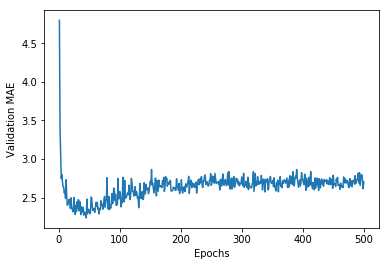

In [38]:
plt.plot(range(1,len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [40]:
def smooth_curve(points, factor=0.9):
    smoothed_points=[]
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor+point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [41]:
smoot_mae_history = smooth_curve(average_mae_history[10:])

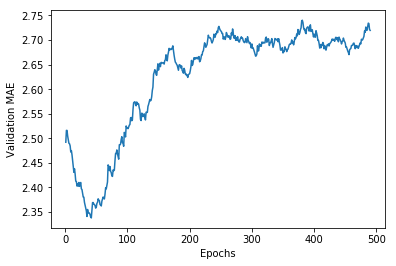

In [44]:
plt.plot(range(1, len(smoot_mae_history) + 1), smoot_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [45]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 184us/step


In [46]:
test_mae_score

3.0753921527488557

In [47]:
test_mse_score

17.151420443665746